In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Extraccion 

#### Cargar el dataset desde un archivo CSV

In [3]:
df = pd.read_csv("../data/spotify_dataset.csv")
print(df.head())  

   Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   


### Borrar columna "unnamed: 0"

In [4]:
df = df.drop(columns=["Unnamed: 0"])

La presencia de Unnamed: 0 sugiere que el CSV se generó con un índice que no se nombró, justificando su eliminación.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

El DataFrame tiene 114,000 filas y 20 columnas tras eliminar Unnamed: 0.
La mayoría de las columnas tienen 114,000 valores no nulos, excepto artists, album_name, y track_name con 113,999 (1 nulo cada una).
Tipos de datos: 5 objetos (cadenas), 9 flotantes, 5 enteros, 1 booleano.

## Nulos

In [54]:
null_values= df.isnull().sum()
print("Valores nulos:\n", null_values)

Valores nulos:
 track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


Los nulos están concentrados en una sola fila (misma cantidad en tres columnas), probablemente una entrada corrupta o incompleta.

In [55]:
df[df["artists"].isnull()]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre


Al no aportar información util sobre la canción, eliminar ese dato es razonable.

In [56]:
df = (df
      .dropna()
      .reset_index(drop=True))

In [57]:
null_values= df.isnull().sum()
print("Valores nulos:\n", null_values)

Valores nulos:
 track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


## Duplicados 

### Identificar duplicados idénticos (filas completamente iguales)

In [ ]:
duplicados = df.duplicated()

print(df[duplicados])

                      track_id                  artists  \
1925    0CDucx9lKxuCZplLXUz0iX   Buena Onda Reggae Club   
2155    2aibwv5hGXSgw7Yru8IYTO    Red Hot Chili Peppers   
3738    7mULVp0DJrI2Nd6GesLvxn             Joy Division   
4648    6d3RIvHfVkoOtW1WHXmbX3          Little Symphony   
5769    481beimUiUnMUzSbOAFcUT             SUPER BEAVER   
...                        ...                      ...   
111245  0sSjIvTvd6fUSZZ5rnTPDW  Everything But The Girl   
111361  2zg3iJW4fK7KZgHOvJU67z                Faithless   
111979  46FPub2Fewe7XrgM0smTYI                Morcheeba   
112967  6qVA1MqDrDKfk9144bhoKp              Acil Servis   
113344  5WaioelSGekDk3UNQy8zaw              Matt Redman   

                                              album_name  \
1925                                             Disco 2   
2155                                    Stadium Arcadium   
3738                                  Timeless Rock Hits   
4648                                            Ser

In [59]:
df = df.drop_duplicates()

### Identificar duplicados por 'track_id' (mismo ID pero posiblemente diferentes valores en otras columnas)

In [60]:
duplicados_id = df[df.duplicated(subset='track_id')]
print(duplicados_id)

                      track_id                                     artists  \
3000    5E30LdtzQTGqRvNd7l6kG5                           The Neighbourhood   
3002    2K7xn816oNHJZ0aVqdQsha                           The Neighbourhood   
3003    2QjOHCTQ1Jl3zawyYOpxh6                           The Neighbourhood   
3011    6rrKbzJGGDlSZgLphopS49                                   The Score   
3012    0AUyNF6iFxMNQsNx2nhtrw                                    grandson   
...                        ...                                         ...   
113571  1saXUvvFlAQaefZUFVmhCn                   Bethel Music;Paul McClure   
113604  1Q5jFp1g2Ns4gBsHRpcqhu  Bethel Music;Jenn Johnson;Michaela Gentile   
113616  71dLJx3qHOTQMTvvoE2dmd                    Bethel Music;Amanda Cook   
113618  6OG5TBCmuTOuWCzSGsETrE     Bethel Music;Brian Johnson;Jenn Johnson   
113640  7xsirhcgFWOnItsGuBfrv9            Bethel Music;Steffany Gretzinger   

                                             album_name  \
3000

Hay 23,809 filas duplicadas por track_id, lo que indica canciones repetidas con diferentes track_genre.
Ejemplo: "Sweater Weather" de The Neighbourhood aparece múltiples veces.

In [61]:
conteo_ids = df['track_id'].value_counts()
duplicados_reales = conteo_ids[conteo_ids > 1]

print(f"Total de track_id únicos con duplicados: {duplicados_reales.shape[0]}")
print(duplicados_reales.head())

Total de track_id únicos con duplicados: 16299
track_id
6S3JlDAGk3uu3NtZbPnuhS    9
2kkvB3RNRzwjFdGhaUA0tz    8
2Ey6v4Sekh3Z0RUSISRosD    8
2aaClnypAakdAmLw74JXxB    7
5sqkarfxe7UejHTlCtHCLS    7
Name: count, dtype: int64


In [62]:
# Ejemplo con uno de los duplicados
df[df['track_id'] == '2kkvB3RNRzwjFdGhaUA0tz']

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
8262,2kkvB3RNRzwjFdGhaUA0tz,Derek & The Dominos,Layla And Other Assorted Love Songs (Remastere...,Layla,74,423840,False,0.404,0.902,1,-3.88,1,0.0665,0.577,0.297,0.287,0.497,115.669,4,blues
11170,2kkvB3RNRzwjFdGhaUA0tz,Derek & The Dominos,Layla And Other Assorted Love Songs (Remastere...,Layla,74,423840,False,0.404,0.902,1,-3.88,1,0.0665,0.577,0.297,0.287,0.497,115.669,4,british
19915,2kkvB3RNRzwjFdGhaUA0tz,Derek & The Dominos,Layla And Other Assorted Love Songs (Remastere...,Layla,74,423840,False,0.404,0.902,1,-3.88,1,0.0665,0.577,0.297,0.287,0.497,115.669,4,country
34974,2kkvB3RNRzwjFdGhaUA0tz,Derek & The Dominos,Layla And Other Assorted Love Songs (Remastere...,Layla,74,423840,False,0.404,0.902,1,-3.88,1,0.0665,0.577,0.297,0.287,0.497,115.669,4,folk
47257,2kkvB3RNRzwjFdGhaUA0tz,Derek & The Dominos,Layla And Other Assorted Love Songs (Remastere...,Layla,74,423840,False,0.404,0.902,1,-3.88,1,0.0665,0.577,0.297,0.287,0.497,115.669,4,hard-rock
84163,2kkvB3RNRzwjFdGhaUA0tz,Derek & The Dominos,Layla And Other Assorted Love Songs (Remastere...,Layla,74,423840,False,0.404,0.902,1,-3.88,1,0.0665,0.577,0.297,0.287,0.497,115.669,4,psych-rock
99874,2kkvB3RNRzwjFdGhaUA0tz,Derek & The Dominos,Layla And Other Assorted Love Songs (Remastere...,Layla,74,423840,False,0.404,0.902,1,-3.88,1,0.0665,0.577,0.297,0.287,0.497,115.669,4,singer-songwriter
102883,2kkvB3RNRzwjFdGhaUA0tz,Derek & The Dominos,Layla And Other Assorted Love Songs (Remastere...,Layla,74,423840,False,0.404,0.902,1,-3.88,1,0.0665,0.577,0.297,0.287,0.497,115.669,4,songwriter


La duplicación por track_id se debe únicamente a track_genre, mientras que otros atributos son idénticos.
Esto sugiere que el dataset clasifica una misma canción en múltiples géneros, lo que requiere consolidación.

#### Mapeo simple de géneros a categorías más amplias

In [63]:
df["track_genre"].unique()


array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

In [64]:


genre_categories = {
    'rock': 'Rock', 'rockabilly': 'Rock', 'alt-rock': 'Rock', 'alternative': 'Rock', 'emo': 'Rock', 
    'goth': 'Rock', 'grunge': 'Rock', 'hard-rock': 'Rock', 'psych-rock': 'Rock', 'punk-rock': 'Rock', 
    'rock-n-roll': 'Rock',
    'pop': 'Pop', 'power-pop': 'Pop', 'j-pop': 'Pop', 'k-pop': 'Pop', 'synth-pop': 'Pop', 
    'indie-pop': 'Pop', 'cantopop': 'Pop', 'mandopop': 'Pop',
    'electronic': 'Electronic', 'edm': 'Electronic', 'techno': 'Electronic', 'house': 'Electronic', 
    'trance': 'Electronic', 'idm': 'Electronic', 'hardstyle': 'Electronic', 'progressive-house': 'Electronic', 
    'minimal-techno': 'Electronic', 'electro': 'Electronic', 'breakbeat': 'Electronic', 'drum-and-bass': 'Electronic', 
    'dubstep': 'Electronic', 'chicago-house': 'Electronic', 'deep-house': 'Electronic', 'detroit-techno': 'Electronic', 
    'industrial': 'Electronic', 'trip-hop': 'Electronic',
    'classical': 'Classical', 'opera': 'Classical', 'new-age': 'Classical', 'piano': 'Classical', 
    'ambient': 'Classical',
    'folk': 'Folk', 'acoustic': 'Folk', 'bluegrass': 'Folk', 'country': 'Folk', 'honky-tonk': 'Folk', 
    'guitar': 'Folk', 'singer-songwriter': 'Folk', 'songwriter': 'Folk',
    'jazz': 'Jazz/Blues', 'blues': 'Jazz/Blues', 'soul': 'Jazz/Blues', 'funk': 'Jazz/Blues', 'groove': 'Jazz/Blues', 
    'r-n-b': 'Jazz/Blues',
    'latin': 'Latin', 'latino': 'Latin', 'salsa': 'Latin', 'samba': 'Latin', 'sertanejo': 'Latin', 
    'pagode': 'Latin', 'tango': 'Latin', 'forro': 'Latin', 'mpb': 'Latin', 'reggaeton': 'Latin',
    'hip-hop': 'Hip-Hop', 'afrobeat': 'Hip-Hop', 'dancehall': 'Hip-Hop',
    'metal': 'Metal', 'heavy-metal': 'Metal', 'death-metal': 'Metal', 'black-metal': 'Metal', 
    'metalcore': 'Metal', 'grindcore': 'Metal',
    'punk': 'Punk', 'ska': 'Punk', 'hardcore': 'Punk',
    'reggae': 'Reggae', 'dub': 'Reggae',
    'happy': 'Moods', 'sleep': 'Moods', 'chill': 'Moods', 'sad': 'Moods', 'study': 'Moods', 
    'romance': 'Moods', 'party': 'Moods',
    'french': 'Regional', 'german': 'Regional', 'british': 'Regional', 'turkish': 'Regional', 
    'iranian': 'Regional', 'spanish': 'Regional', 'swedish': 'Regional', 'indian': 'Regional', 
    'malay': 'Regional', 'brazil': 'Regional',
    'kids': 'Other', 'anime': 'Other', 'comedy': 'Other', 'disney': 'Other', 'show-tunes': 'Other', 
    'club': 'Other', 'gospel': 'Other', 'world-music': 'Other', 'children': 'Other', 'pop-film': 'Other', 
    'j-idol': 'Pop', 'j-dance': 'Electronic'
}

# Function to assign category
def get_category(genre):
    """Asigna una categoría más amplia a un género musical específico.

    Args:
        genre: Género musical como cadena de texto.

    Returns:
        str: Categoría asignada o 'Other' si no coincide con ninguna clave.
    """
    if not genre: 
        return 'Unknown'
    genre = genre.lower()
    for key, category in genre_categories.items():
        if key in genre:
            return category
    return 'Other'  


df['track_genre'] = df['track_genre'].apply(get_category)


In [65]:
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,Folk
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,Folk
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,Folk
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,Folk
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,Folk


In [66]:
df[df['track_id'] == '2kkvB3RNRzwjFdGhaUA0tz']

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
8262,2kkvB3RNRzwjFdGhaUA0tz,Derek & The Dominos,Layla And Other Assorted Love Songs (Remastere...,Layla,74,423840,False,0.404,0.902,1,-3.88,1,0.0665,0.577,0.297,0.287,0.497,115.669,4,Jazz/Blues
11170,2kkvB3RNRzwjFdGhaUA0tz,Derek & The Dominos,Layla And Other Assorted Love Songs (Remastere...,Layla,74,423840,False,0.404,0.902,1,-3.88,1,0.0665,0.577,0.297,0.287,0.497,115.669,4,Regional
19915,2kkvB3RNRzwjFdGhaUA0tz,Derek & The Dominos,Layla And Other Assorted Love Songs (Remastere...,Layla,74,423840,False,0.404,0.902,1,-3.88,1,0.0665,0.577,0.297,0.287,0.497,115.669,4,Folk
34974,2kkvB3RNRzwjFdGhaUA0tz,Derek & The Dominos,Layla And Other Assorted Love Songs (Remastere...,Layla,74,423840,False,0.404,0.902,1,-3.88,1,0.0665,0.577,0.297,0.287,0.497,115.669,4,Folk
47257,2kkvB3RNRzwjFdGhaUA0tz,Derek & The Dominos,Layla And Other Assorted Love Songs (Remastere...,Layla,74,423840,False,0.404,0.902,1,-3.88,1,0.0665,0.577,0.297,0.287,0.497,115.669,4,Rock
84163,2kkvB3RNRzwjFdGhaUA0tz,Derek & The Dominos,Layla And Other Assorted Love Songs (Remastere...,Layla,74,423840,False,0.404,0.902,1,-3.88,1,0.0665,0.577,0.297,0.287,0.497,115.669,4,Rock
99874,2kkvB3RNRzwjFdGhaUA0tz,Derek & The Dominos,Layla And Other Assorted Love Songs (Remastere...,Layla,74,423840,False,0.404,0.902,1,-3.88,1,0.0665,0.577,0.297,0.287,0.497,115.669,4,Folk
102883,2kkvB3RNRzwjFdGhaUA0tz,Derek & The Dominos,Layla And Other Assorted Love Songs (Remastere...,Layla,74,423840,False,0.404,0.902,1,-3.88,1,0.0665,0.577,0.297,0.287,0.497,115.669,4,Folk


#### Agrupar los generos y seleccionar el que más se repite

In [67]:
duplicate_columns = ['artists', 'track_id']  


def pick_genre(group):
    """Selecciona una fila de un grupo de duplicados basada en el género más frecuente.

    Args:
        group: Sub-DataFrame con filas duplicadas por 'artists' y 'track_id'.

    Returns:
        Series: Fila seleccionada (más frecuente por género o primera si no hay modo).
    """
    if len(group) == 1:
        return group.iloc[0]  
    most_common = group['track_genre'].mode()
    if not most_common.empty:
        return group[group['track_genre'] == most_common[0]].iloc[0]
    return group.iloc[0] 


df = df.groupby(duplicate_columns, as_index=False).apply(pick_genre).reset_index(drop=True)

In [68]:
df[df['track_id'] == '2kkvB3RNRzwjFdGhaUA0tz']

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
20373,2kkvB3RNRzwjFdGhaUA0tz,Derek & The Dominos,Layla And Other Assorted Love Songs (Remastere...,Layla,74,423840,False,0.404,0.902,1,-3.88,1,0.0665,0.577,0.297,0.287,0.497,115.669,4,Folk


La consolidación por artists y track_id seleccionó "Folk" como el género más frecuente (4 de 8), eliminando las otras 7 entradas.
Esto asegura que cada canción tenga un único registro.

In [69]:
conteo_ids = df['track_id'].value_counts()
duplicados_reales = conteo_ids[conteo_ids > 1]

print(f"Total de track_id únicos con duplicados: {duplicados_reales.shape[0]}")
print(duplicados_reales.head())

Total de track_id únicos con duplicados: 0
Series([], Name: count, dtype: int64)


In [70]:
df.shape

(89740, 20)

### Identificar duplicados por combinación de 'track_name' y 'artists'

In [71]:
song_counts = df.value_counts(subset=['track_name', 'artists']).reset_index(name='counts')

# Filtrar solo las combinaciones que aparecen más de una vez
repeated_songs = song_counts[song_counts['counts'] > 1]

# Mostrar resultados
print("=== Canciones duplicadas por 'track_name' y 'artists' ===")
print(f"Número de combinaciones duplicadas: {len(repeated_songs)}")
print(repeated_songs.head(10))

=== Canciones duplicadas por 'track_name' y 'artists' ===
Número de combinaciones duplicadas: 4657
                                    track_name          artists  counts
0            Rockin' Around The Christmas Tree       Brenda Lee      45
1               Little Saint Nick - 1991 Remix   The Beach Boys      41
2                              Run Rudolph Run      Chuck Berry      40
3                           Frosty The Snowman  Ella Fitzgerald      34
4       Let It Snow! Let It Snow! Let It Snow!      Dean Martin      32
5                                    Mistletoe    Justin Bieber      31
6                                  Sleigh Ride  Ella Fitzgerald      30
7              I Saw Mommy Kissing Santa Claus    The Jackson 5      27
8                Santa Claus Is Coming To Town    The Jackson 5      26
9  The Christmas Song (Merry Christmas To You)    Nat King Cole      26


Hay 4,657 combinaciones únicas de track_name y artists que aparecen más de una vez.
Las canciones más repetidas son navideñas, como "Rockin' Around The Christmas Tree" (45 veces) y "Run Rudolph Run" (40 veces).

In [72]:
duplicadas = df[(df['track_name'] == "Run Rudolph Run") & (df['artists'] == 'Chuck Berry')]
print(duplicadas.shape)
duplicadas.head()


(40, 20)


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
15631,02NjAsgrCjbFioTyGI0FeT,Chuck Berry,All I Want For Christmas Is You,Run Rudolph Run,0,162897,False,0.647,0.876,10,-5.662,1,0.185,0.881,0.000036,0.26,0.949,151.925,4,Jazz/Blues
15632,03MW3H9B2P7tgpvzG3klNI,Chuck Berry,pov: you hear the bells jingle,Run Rudolph Run,0,162897,False,0.647,0.876,10,-5.662,1,0.185,0.881,0.000036,0.26,0.949,151.925,4,Jazz/Blues
15633,03Uo2utHEdsOoEKwPs4w0G,Chuck Berry,pov: you are walking in a winter wonderland,Run Rudolph Run,0,162897,False,0.647,0.876,10,-5.662,1,0.185,0.881,0.000036,0.26,0.949,151.925,4,Jazz/Blues
15635,0A2fX1kBVpevzGnMjx5fnX,Chuck Berry,Christmas Playlist 2022,Run Rudolph Run,0,162897,False,0.647,0.876,10,-5.662,1,0.185,0.881,0.000036,0.26,0.949,151.925,4,Jazz/Blues
15636,0FJ5C03igALJMeicHGorCo,Chuck Berry,Christmas Best Hits 2022,Run Rudolph Run,0,162897,False,0.647,0.876,10,-5.662,1,0.185,0.881,0.000036,0.26,0.949,151.925,4,Jazz/Blues


Las 40 entradas reflejan la misma canción en diferentes álbumes o recopilaciones, con variaciones mínimas en popularidad y audio, sugiriendo que el dataset incluye múltiples versiones o reubicaciones de una misma grabación.

#### Crear una lista de columnas para eliminar duplicados, excluyendo 'track_id' y 'album_name'

In [73]:

subset_cols = [col for col in df.columns if col not in ["track_id", "album_name"]]

df = df.drop_duplicates(subset=subset_cols, keep="first")

df.shape



(86061, 20)

In [74]:
duplicadas = df[(df['track_name'] == "Run Rudolph Run") & (df['artists'] == 'Chuck Berry')]
print(duplicadas.shape)
duplicadas.head()

(4, 20)


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
15631,02NjAsgrCjbFioTyGI0FeT,Chuck Berry,All I Want For Christmas Is You,Run Rudolph Run,0,162897,False,0.647,0.876,10,-5.662,1,0.1850,0.881,0.000036,0.2600,0.949,151.925,4,Jazz/Blues
15638,0HeG8Hl4Upx3zqwK7VNY2l,Chuck Berry,Christmas Songs 2022,Run Rudolph Run,1,162897,False,0.647,0.876,10,-5.662,1,0.1850,0.881,0.000036,0.2600,0.949,151.925,4,Jazz/Blues
15645,1GqAFWj0HSbX055zDc94Wj,Chuck Berry,Classic Christmas Greatest Hits,Run Rudolph Run,0,164160,False,0.682,0.776,7,-8.314,0,0.1140,0.830,0.000011,0.1700,0.959,151.799,4,Jazz/Blues
15655,2pnPe4pJtq7689i5ydzvJJ,Chuck Berry,Rock 'N' Roll Rarities,Run Rudolph Run,59,165733,False,0.681,0.715,7,-10.609,0,0.0912,0.812,0.000009,0.0777,0.957,152.132,4,Rock


#### Seleccionar la fila con mayor popularidad por combinación de 'track_name' y 'artists'

In [75]:
idx = df.groupby(['track_name', 'artists'])['popularity'].idxmax()
df = df.loc[idx].reset_index(drop=True)


In [76]:
df.shape

(81343, 20)

In [77]:
duplicadas = df[(df['track_name'] == "Run Rudolph Run") & (df['artists'] == 'Chuck Berry')]
print(duplicadas.shape)
duplicadas.head()

(1, 20)


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
55570,2pnPe4pJtq7689i5ydzvJJ,Chuck Berry,Rock 'N' Roll Rarities,Run Rudolph Run,59,165733,False,0.681,0.715,7,-10.609,0,0.0912,0.812,0.000009,0.0777,0.957,152.132,4,Rock


La selección por popularidad eligió la versión más conocida, eliminando las de popularidad baja (0, 1), lo que es coherente con el objetivo de mantener registros representativos.

### Mostrar estadísticas descriptivas de las columnas numéricas

In [78]:
df.describe()


,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,81343.000000,8.134300e+04,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000
mean,35.242111,2.313971e+05,0.559285,0.634894,5.285335,-8.598587,0.632519,0.088989,0.329703,0.184738,0.219751,0.463301,122.132604,3.896893
std,19.414223,1.164745e+05,0.177734,0.258651,3.557453,5.305827,0.482122,0.116622,0.339945,0.331602,0.198269,0.263406,30.122034,0.456624
min,0.000000,8.586000e+03,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,1.738660e+05,0.446000,0.455000,2.000000,-10.459000,0.000000,0.036100,0.015900,0.000000,0.098600,0.241000,99.376500,4.000000
50%,35.000000,2.152000e+05,0.573000,0.678000,5.000000,-7.267000,1.000000,0.049100,0.190000,0.000089,0.133000,0.449000,122.028000,4.000000
75%,49.000000,2.673330e+05,0.690000,0.856500,8.000000,-5.143000,1.000000,0.087000,0.629000,0.153000,0.283000,0.676000,140.123500,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


El dataset tiene una distribución variada en métricas de audio y popularidad, con canciones típicamente de duración media (~3-4 min) y moderadamente bailables/energéticas.

### Numericas a categoricas 

In [79]:
df['duration_min'] = df['duration_ms'] / 60000
def categorize_popularity(p):
    """Categoriza la popularidad en niveles bajo, medio y alto.

    Args:
        p: Valor de popularidad (int).

    Returns:
        str: Categoría asignada ('low', 'medium', 'high').
    """
    if p < 30:
        return 'low'
    elif p < 70:
        return 'medium'
    else:
        return 'high'

df['popularity_cat'] = df['popularity'].apply(categorize_popularity)


df.head()


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min,popularity_cat
0,0fROT4kK5oTm8xO8PX6EJF,Rilès,!I'll Be Back!,!I'll Be Back!,52,178533,True,0.823,0.6120,1,...,0.2480,0.168,0.00000,0.1090,0.6880,142.959,4,Regional,2.975550,medium
1,1hH0t381PIXmUVWyG1Vj3p,Brian Hyland,The Bashful Blond,"""A"" You're Adorable",39,151680,False,0.615,0.3750,0,...,0.0319,0.482,0.00000,0.1110,0.9220,110.720,4,Rock,2.528000,medium
2,1B45DvGMoFWdbAEUH2qliG,Little Apple Band,The Favorite Songs Of Sesame Street,"""C"" IS FOR COOKIE",32,84305,False,0.553,0.8120,3,...,0.0558,0.132,0.00001,0.0794,0.8710,118.368,4,Other,1.405083,medium
3,73lXf5if6MWVWnsgXhK8bd,Little Apple Band,Sesame Street and Friends,"""C"" is for Cookie",8,86675,False,0.664,0.6110,3,...,0.0886,0.120,0.00000,0.0408,0.7580,118.443,4,Other,1.444583,low
4,0jmz4aHEIBCRgrcV2xEkwB,Traditional;Sistine Chapel Choir;Massimo Palom...,Classical Christmas,"""Christe, Redemptor omnium""",0,289133,False,0.111,0.0568,10,...,0.0551,0.990,0.69700,0.1100,0.0395,169.401,1,Moods,4.818883,low


In [80]:
def categorize_duration(d):
    """Categoriza la duración en minutos en corta, media y larga.

    Args:
        d: Duración en minutos (float).

    Returns:
        str: Categoría asignada ('short', 'medium', 'long').
    """
    if d < 2.5:
        return 'short'
    elif d <= 4:
        return 'medium'
    else:
        return 'long'

df['duration_cat'] = df['duration_min'].apply(categorize_duration)
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min,popularity_cat,duration_cat
0,0fROT4kK5oTm8xO8PX6EJF,Rilès,!I'll Be Back!,!I'll Be Back!,52,178533,True,0.823,0.6120,1,...,0.168,0.00000,0.1090,0.6880,142.959,4,Regional,2.975550,medium,medium
1,1hH0t381PIXmUVWyG1Vj3p,Brian Hyland,The Bashful Blond,"""A"" You're Adorable",39,151680,False,0.615,0.3750,0,...,0.482,0.00000,0.1110,0.9220,110.720,4,Rock,2.528000,medium,medium
2,1B45DvGMoFWdbAEUH2qliG,Little Apple Band,The Favorite Songs Of Sesame Street,"""C"" IS FOR COOKIE",32,84305,False,0.553,0.8120,3,...,0.132,0.00001,0.0794,0.8710,118.368,4,Other,1.405083,medium,short
3,73lXf5if6MWVWnsgXhK8bd,Little Apple Band,Sesame Street and Friends,"""C"" is for Cookie",8,86675,False,0.664,0.6110,3,...,0.120,0.00000,0.0408,0.7580,118.443,4,Other,1.444583,low,short
4,0jmz4aHEIBCRgrcV2xEkwB,Traditional;Sistine Chapel Choir;Massimo Palom...,Classical Christmas,"""Christe, Redemptor omnium""",0,289133,False,0.111,0.0568,10,...,0.990,0.69700,0.1100,0.0395,169.401,1,Moods,4.818883,low,long


In [81]:
def categorize_level(x):
    """Categoriza un valor numérico entre 0 y 1 en bajo, medio y alto.

    Args:
        x: Valor numérico entre 0 y 1 (float).

    Returns:
        str: Categoría asignada ('low', 'medium', 'high').
    """
    if x < 0.33:
        return 'low'
    elif x < 0.66:
        return 'medium'
    else:
        return 'high'

df['danceability_cat'] = df['danceability'].apply(categorize_level)
df['energy_cat'] = df['energy'].apply(categorize_level)

df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,liveness,valence,tempo,time_signature,track_genre,duration_min,popularity_cat,duration_cat,danceability_cat,energy_cat
0,0fROT4kK5oTm8xO8PX6EJF,Rilès,!I'll Be Back!,!I'll Be Back!,52,178533,True,0.823,0.6120,1,...,0.1090,0.6880,142.959,4,Regional,2.975550,medium,medium,high,medium
1,1hH0t381PIXmUVWyG1Vj3p,Brian Hyland,The Bashful Blond,"""A"" You're Adorable",39,151680,False,0.615,0.3750,0,...,0.1110,0.9220,110.720,4,Rock,2.528000,medium,medium,medium,medium
2,1B45DvGMoFWdbAEUH2qliG,Little Apple Band,The Favorite Songs Of Sesame Street,"""C"" IS FOR COOKIE",32,84305,False,0.553,0.8120,3,...,0.0794,0.8710,118.368,4,Other,1.405083,medium,short,medium,high
3,73lXf5if6MWVWnsgXhK8bd,Little Apple Band,Sesame Street and Friends,"""C"" is for Cookie",8,86675,False,0.664,0.6110,3,...,0.0408,0.7580,118.443,4,Other,1.444583,low,short,high,medium
4,0jmz4aHEIBCRgrcV2xEkwB,Traditional;Sistine Chapel Choir;Massimo Palom...,Classical Christmas,"""Christe, Redemptor omnium""",0,289133,False,0.111,0.0568,10,...,0.1100,0.0395,169.401,1,Moods,4.818883,low,long,low,low


In [82]:
def categorize_valence(v):
    """Categoriza la valencia en niveles de estado emocional.

    Args:
        v: Valor de valencia entre 0 y 1 (float).

    Returns:
        str: Categoría asignada ('very sad', 'sad', 'neutral', 'happy', 'very happy').
    """
    if v < 0.2:
        return 'very sad'
    elif v < 0.4:
        return 'sad'
    elif v < 0.6:
        return 'neutral'
    elif v < 0.8:
        return 'happy'
    else:
        return 'very happy'

df['valence_cat'] = df['valence'].apply(categorize_valence)


df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,valence,tempo,time_signature,track_genre,duration_min,popularity_cat,duration_cat,danceability_cat,energy_cat,valence_cat
0,0fROT4kK5oTm8xO8PX6EJF,Rilès,!I'll Be Back!,!I'll Be Back!,52,178533,True,0.823,0.6120,1,...,0.6880,142.959,4,Regional,2.975550,medium,medium,high,medium,happy
1,1hH0t381PIXmUVWyG1Vj3p,Brian Hyland,The Bashful Blond,"""A"" You're Adorable",39,151680,False,0.615,0.3750,0,...,0.9220,110.720,4,Rock,2.528000,medium,medium,medium,medium,very happy
2,1B45DvGMoFWdbAEUH2qliG,Little Apple Band,The Favorite Songs Of Sesame Street,"""C"" IS FOR COOKIE",32,84305,False,0.553,0.8120,3,...,0.8710,118.368,4,Other,1.405083,medium,short,medium,high,very happy
3,73lXf5if6MWVWnsgXhK8bd,Little Apple Band,Sesame Street and Friends,"""C"" is for Cookie",8,86675,False,0.664,0.6110,3,...,0.7580,118.443,4,Other,1.444583,low,short,high,medium,happy
4,0jmz4aHEIBCRgrcV2xEkwB,Traditional;Sistine Chapel Choir;Massimo Palom...,Classical Christmas,"""Christe, Redemptor omnium""",0,289133,False,0.111,0.0568,10,...,0.0395,169.401,1,Moods,4.818883,low,long,low,low,very sad


### Crear columnas booleanas para 'loudness' y 'liveness'

In [83]:
df['is_loud'] = df['loudness'] > -5
df['is_live'] = df['liveness'] > 0.8

df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,time_signature,track_genre,duration_min,popularity_cat,duration_cat,danceability_cat,energy_cat,valence_cat,is_loud,is_live
0,0fROT4kK5oTm8xO8PX6EJF,Rilès,!I'll Be Back!,!I'll Be Back!,52,178533,True,0.823,0.6120,1,...,4,Regional,2.975550,medium,medium,high,medium,happy,False,False
1,1hH0t381PIXmUVWyG1Vj3p,Brian Hyland,The Bashful Blond,"""A"" You're Adorable",39,151680,False,0.615,0.3750,0,...,4,Rock,2.528000,medium,medium,medium,medium,very happy,False,False
2,1B45DvGMoFWdbAEUH2qliG,Little Apple Band,The Favorite Songs Of Sesame Street,"""C"" IS FOR COOKIE",32,84305,False,0.553,0.8120,3,...,4,Other,1.405083,medium,short,medium,high,very happy,False,False
3,73lXf5if6MWVWnsgXhK8bd,Little Apple Band,Sesame Street and Friends,"""C"" is for Cookie",8,86675,False,0.664,0.6110,3,...,4,Other,1.444583,low,short,high,medium,happy,False,False
4,0jmz4aHEIBCRgrcV2xEkwB,Traditional;Sistine Chapel Choir;Massimo Palom...,Classical Christmas,"""Christe, Redemptor omnium""",0,289133,False,0.111,0.0568,10,...,1,Moods,4.818883,low,long,low,low,very sad,False,False


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81343 entries, 0 to 81342
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          81343 non-null  object 
 1   artists           81343 non-null  object 
 2   album_name        81343 non-null  object 
 3   track_name        81343 non-null  object 
 4   popularity        81343 non-null  int64  
 5   duration_ms       81343 non-null  int64  
 6   explicit          81343 non-null  bool   
 7   danceability      81343 non-null  float64
 8   energy            81343 non-null  float64
 9   key               81343 non-null  int64  
 10  loudness          81343 non-null  float64
 11  mode              81343 non-null  int64  
 12  speechiness       81343 non-null  float64
 13  acousticness      81343 non-null  float64
 14  instrumentalness  81343 non-null  float64
 15  liveness          81343 non-null  float64
 16  valence           81343 non-null  float6

## Eliminar columnas numéricas originales y otras no esenciales

In [85]:
df = df.drop(columns= [
    'popularity', 'duration_ms', 'danceability', 'energy', 'valence', 
    'loudness', 'liveness', 'key', 'mode', 'time_signature', 'tempo', "speechiness", "acousticness", "instrumentalness"
])


In [86]:
df.head()

,track_id,artists,album_name,track_name,explicit,track_genre,duration_min,popularity_cat,duration_cat,danceability_cat,energy_cat,valence_cat,is_loud,is_live
0,0fROT4kK5oTm8xO8PX6EJF,Rilès,!I'll Be Back!,!I'll Be Back!,True,Regional,2.975550,medium,medium,high,medium,happy,False,False
1,1hH0t381PIXmUVWyG1Vj3p,Brian Hyland,The Bashful Blond,"""A"" You're Adorable",False,Rock,2.528000,medium,medium,medium,medium,very happy,False,False
2,1B45DvGMoFWdbAEUH2qliG,Little Apple Band,The Favorite Songs Of Sesame Street,"""C"" IS FOR COOKIE",False,Other,1.405083,medium,short,medium,high,very happy,False,False
3,73lXf5if6MWVWnsgXhK8bd,Little Apple Band,Sesame Street and Friends,"""C"" is for Cookie",False,Other,1.444583,low,short,high,medium,happy,False,False
4,0jmz4aHEIBCRgrcV2xEkwB,Traditional;Sistine Chapel Choir;Massimo Palom...,Classical Christmas,"""Christe, Redemptor omnium""",False,Moods,4.818883,low,long,low,low,very sad,False,False


## Filtrar géneros no deseados ('Other' y 'Moods')

In [87]:
df["track_genre"].value_counts()

track_genre
Electronic    15076
Other         10370
Regional       7185
Pop            6992
Latin          6807
Rock           5975
Moods          5909
Folk           5567
Metal          4954
Classical      4286
Jazz/Blues     3452
Hip-Hop        2254
Punk           2202
Reggae          314
Name: count, dtype: int64

In [88]:
df = df[df["track_genre"].str.lower() != "other"].reset_index(drop=True)

In [89]:
df = df[~df["track_genre"].str.lower().isin(["moods"])].reset_index(drop=True)


In [90]:
df["track_genre"].value_counts()

track_genre
Electronic    15076
Regional       7185
Pop            6992
Latin          6807
Rock           5975
Folk           5567
Metal          4954
Classical      4286
Jazz/Blues     3452
Hip-Hop        2254
Punk           2202
Reggae          314
Name: count, dtype: int64

El filtrado enfocó el dataset en géneros musicales definidos, eliminando ~19% de las filas para análisis más específicos. Se eliminaron estos datos ya que representaban Podcast y no canciones. 

## Visualizaciones

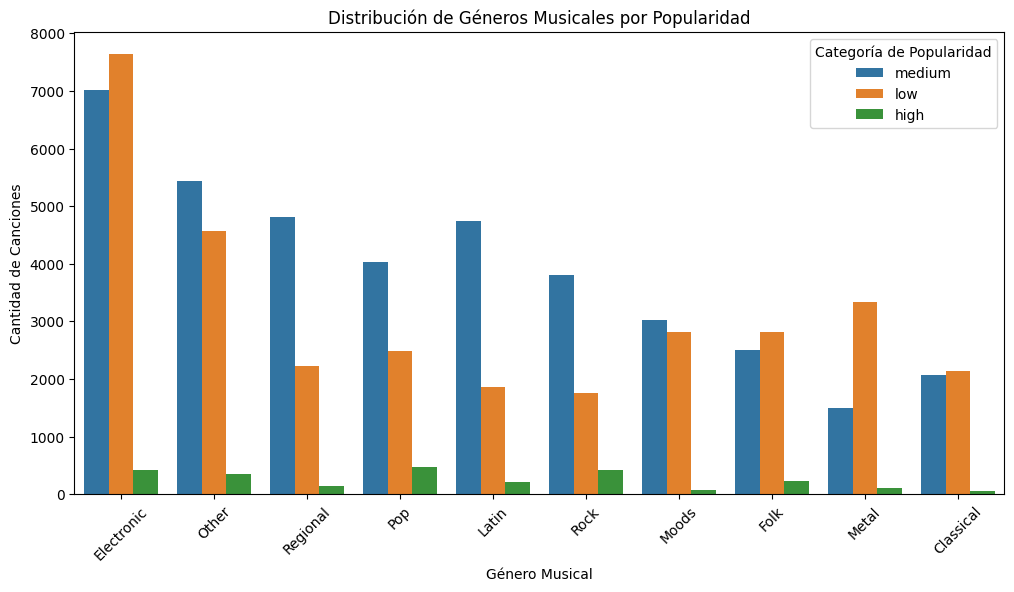

In [36]:
plt.figure(figsize=(12, 6))
sns.countplot(x="track_genre", hue="popularity_cat", data=df, 
              order=df["track_genre"].value_counts().index[:10])
plt.title("Distribución de Géneros Musicales por Popularidad")
plt.xlabel("Género Musical")
plt.ylabel("Cantidad de Canciones")
plt.xticks(rotation=45)
plt.legend(title="Categoría de Popularidad")
plt.show()

Dominancia de "Medium": La gran mayoría de las canciones son de popularidad media.

Géneros más representados: Electrónica (7500) y regional (4500) lideran, lo que podría reflejar su prevalencia en Spotify o un sesgo en la recolección de datos hacia estos géneros.

Falta de "High": La escasez de canciones en "high" podría deberse a un umbral muy alto para esta categoría.
Géneros de nicho (Classical, Metal): Tienen menos canciones (~1500-2000), lo esperado dado su público más específico.

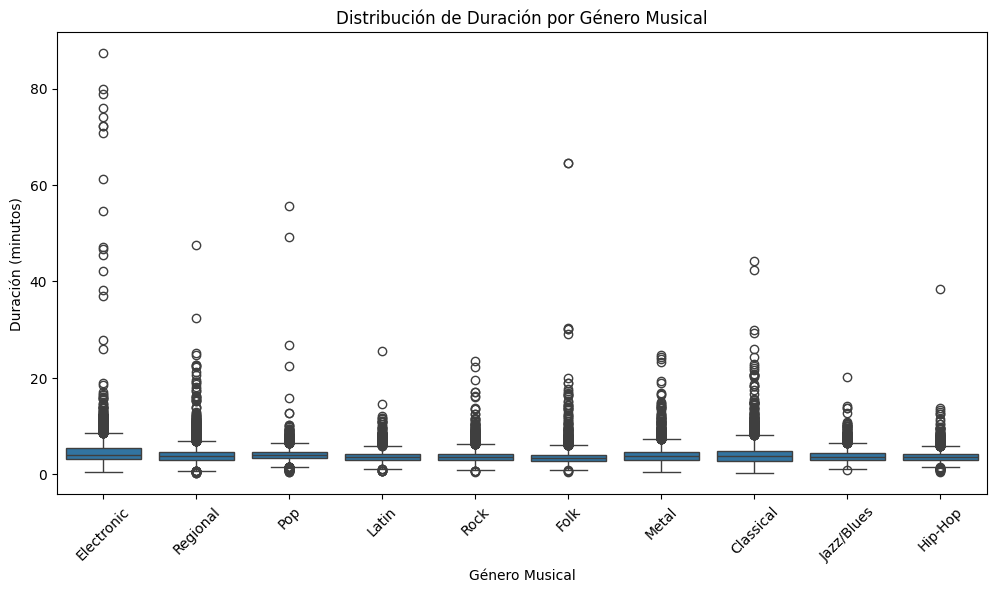

In [91]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="track_genre", y="duration_min", data=df, 
            order=df["track_genre"].value_counts().index[:10])
plt.title("Distribución de Duración por Género Musical")
plt.xlabel("Género Musical")
plt.ylabel("Duración (minutos)")
plt.xticks(rotation=45)
plt.show()

Géneros comerciales (pop, hip-hop) tienen duraciones cortas (~3-3.5 min), mientras que géneros experimentales (electrónica, metal) permiten más variación.

Outliers largos en electrónica y regional sugieren nichos específicos (mixes, grabaciones extensas).

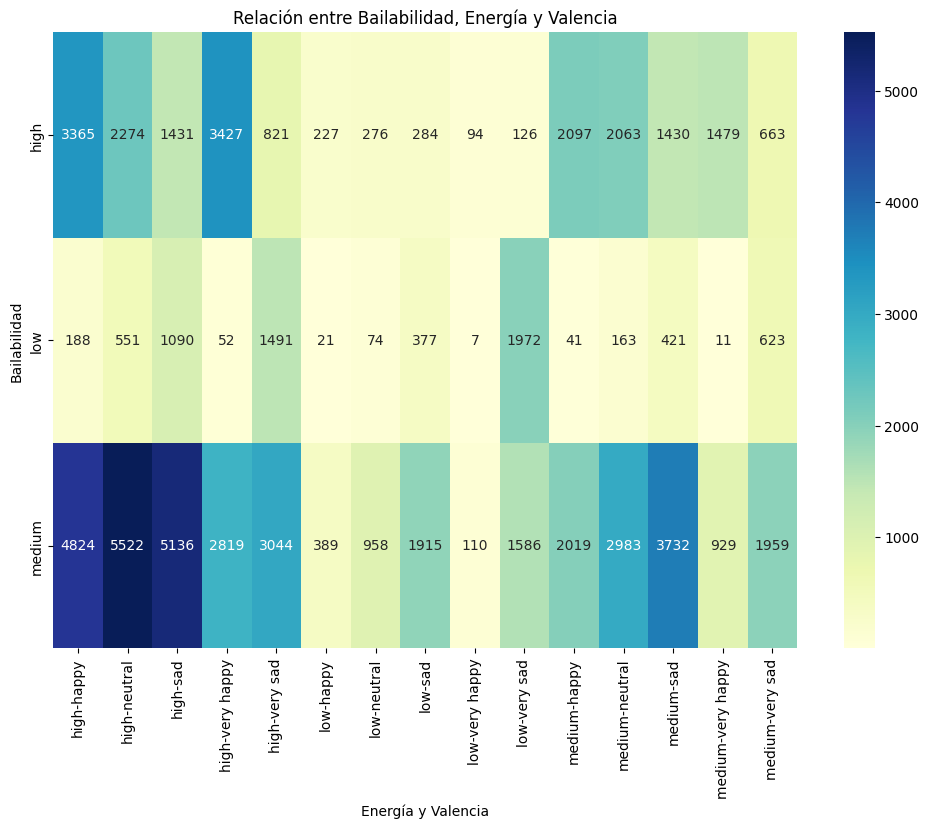

In [92]:
# Crear tabla de contingencia
contingency = pd.crosstab(index=df["danceability_cat"], 
                          columns=[df["energy_cat"], df["valence_cat"]])
plt.figure(figsize=(12, 8))
sns.heatmap(contingency, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Relación entre Bailabilidad, Energía y Valencia")
plt.xlabel("Energía y Valencia")
plt.ylabel("Bailabilidad")
plt.show()

Alta Bailabilidad: La combinación "high danceability, high energy, sad" (3427) es sorprendentemente alta, sugiriendo que muchas canciones bailables tienen un tono emocional triste (ej. pop o electrónica con letras melancólicas). "High energy, very-happy" (3365) también es común, alineado con géneros como dance o EDM.

Media Bailabilidad: Aquí, las canciones "high energy, happy" (5522) y "high energy, neutral" (5136) predominan, indicando que muchas canciones con bailabilidad moderada son energéticas y emocionalmente neutras o positivas (ej. pop o rock).

Baja Energía: Las canciones con baja energía son más comunes en "medium danceability" (ej. 1959 en "low energy, very-happy") que en "high danceability" (94), lo que sugiere que la baja energía no se asocia típicamente con alta bailabilidad.

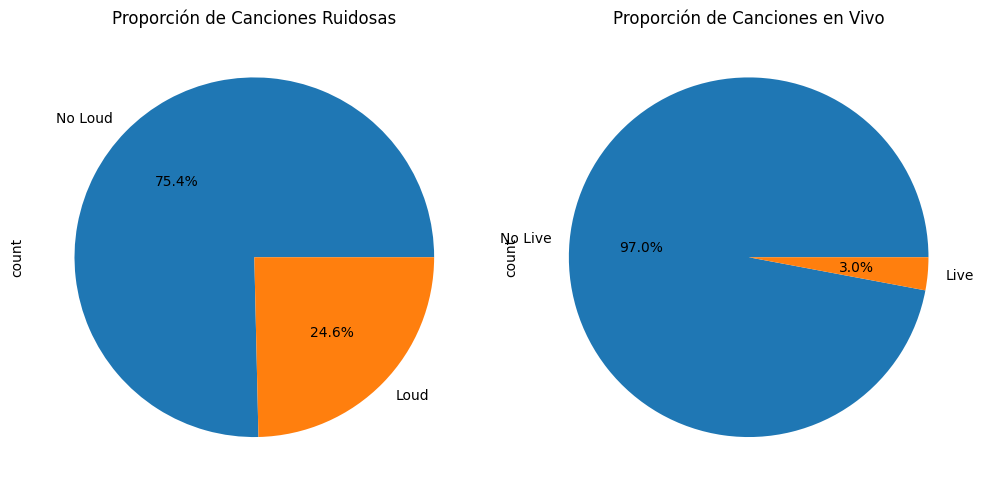

In [93]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df["is_loud"].value_counts().plot.pie(autopct='%1.1f%%', labels=["No Loud", "Loud"], 
                                             title="Proporción de Canciones Ruidosas")
plt.subplot(1, 2, 2)
df["is_live"].value_counts().plot.pie(autopct='%1.1f%%', labels=["No Live", "Live"], 
                                             title="Proporción de Canciones en Vivo")
plt.tight_layout()
plt.show()

Canciones Ruidosas: El 24.6% de canciones clasificadas como "Loud" podría incluir géneros como rock, metal o electrónica, donde niveles altos de volumen son comunes. El 75.4% "No Loud" sugiere que muchas canciones priorizan un sonido más suave o equilibrado, típico de géneros como pop o jazz.

Canciones en Vivo: El bajo porcentaje de canciones en vivo (3.0%) refleja que la mayoría de las pistas en Spotify son grabaciones de estudio, lo esperado en una plataforma de streaming. Las grabaciones en vivo suelen ser menos comunes y a menudo se incluyen en álbumes específicos (ej. "Live at...").